In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn import manifold
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
import umap.umap_ as umap

from sklearn.datasets import load_wine
%matplotlib inline

#### Read data

In [24]:
# Load dataset
wine_data = load_wine().data

In [59]:
winedata_pd = pd.DataFrame(wine_data)
winedata_pd.columns = ["feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8", "feature_9", "feature_10", "feature_11", "feature_12", "target"]
winedata_pd["target"] = winedata_pd["target"].astype("int")
winedata_pd.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [83]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the DataFrame (scale columns to range 0-1)
winedata_normalized = pd.DataFrame(scaler.fit_transform(winedata_pd), columns=winedata_pd.columns)

#### Principal Component Analysis (PCA)

Advantages:
(1) Fast for linear data.
(2) Maximizes variance in fewer dimensions.
(3) Reduces number of features, simplifying models.

Disadvantages:
(1) Ineffective for non-linear data.
(2) Requires feature scaling

Output: Provides principal components that can be interpreted as new features. The principal components are linear combinations of the original features, and the variance explained by each component is meaningful.
Interpretability: PCA results are more interpretable since the principal components represent directions of maximum variance. The first few components often retain most of the information, making it easy to understand the data structure.

In [74]:
# Applying PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(winedata_normalized)

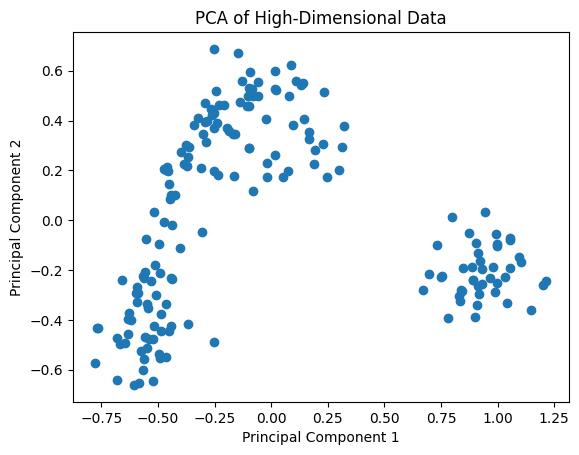

In [75]:
# Plotting the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('PCA of High-Dimensional Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### T-SNE

Advantages:
(1) Captures complex relationships.
(2) Excellent for visualizing clusters and local structures.
(3) Produces intuitive 2D/3D plots revealing data structure.

Disadvantages:
(1) Slow, especially on large datasets.
(2) May not preserve global data structure well.
(3) Different runs can produce varying results.

Perplexity: It is a parameter that controls the balance between local and global aspects of the data. A higher perplexity considers more distant points as neighbors, while a lower perplexity focuses more on close neighbors.

Output: Provides a low-dimensional embedding that is primarily useful for visualization. The relative distances between points are meaningful, but the absolute positions and scales are not.
Interpretability: While t-SNE effectively reveals clusters and local structures, it’s harder to interpret in terms of global structure or principal components. The axes in t-SNE plots do not have a clear meaning.

In [81]:
tsne = manifold.TSNE(n_components = 2, perplexity = 30, random_state = 42)
tsne_results = tsne.fit_transform(winedata_normalized)

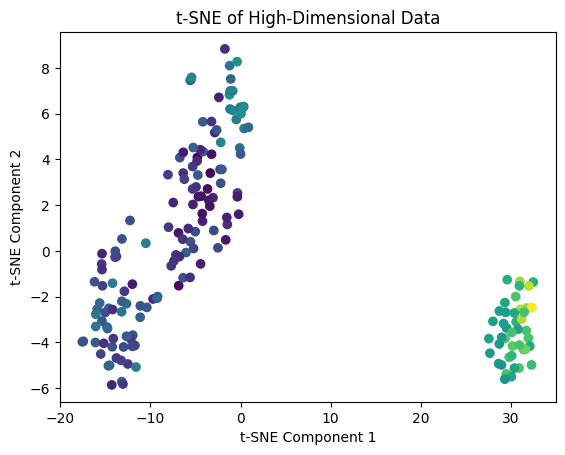

In [82]:
# Plotting the t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=winedata_normalized.target, cmap='viridis')
plt.title('t-SNE of High-Dimensional Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

#### Parallel coordinates

Advantages:
(1) Useful for identifying patterns, correlations, and outliers.
(2) Allows dynamic exploration in interactive visualizations.

Disadvantages:
(1) Can obscure important patterns.

In [87]:
winedata_normalized["Class"] = winedata_normalized['target'].apply(lambda x: 1 if x >= 0.6 else 0)

In [88]:
winedata_normalized.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,target,Class
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


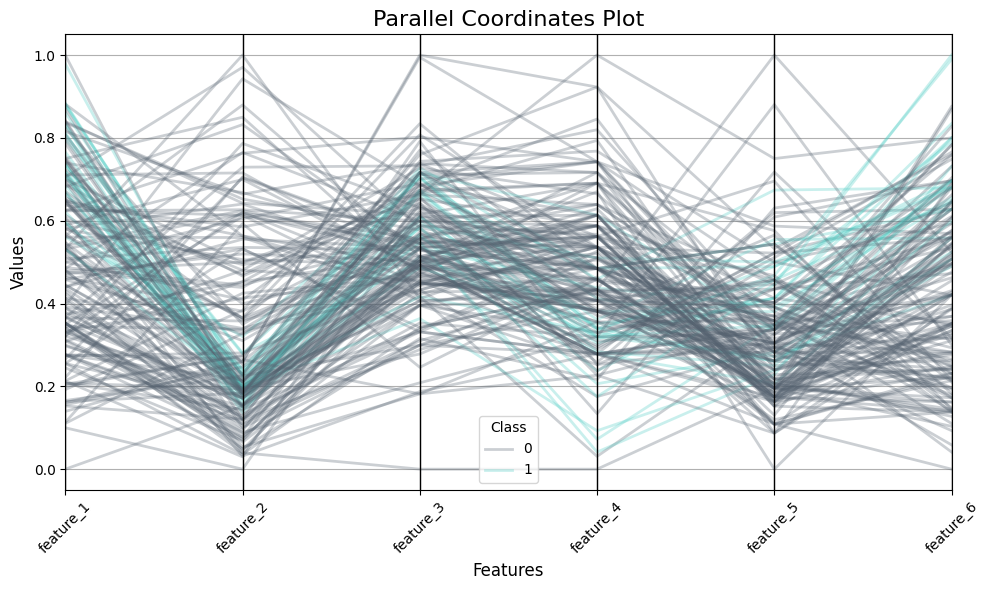

In [90]:
# Plot Parallel Coordinates with enhanced readability
plt.figure(figsize=(10, 6))
parallel_coordinates(winedata_normalized.loc[:, ["feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "Class"]], 'Class', color=('#556270', '#4ECDC4'), alpha=0.3, linewidth=2)

# Enhance readability
plt.title('Parallel Coordinates Plot', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(True)
plt.legend(title='Class', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

#### Uniform Manifold Approximation and Projection (UMAP)

Advantages:
(1) Faster than t-SNE, suitable for large datasets.
(2) Maintains both global and local data structure well.

Disadvantages:
(1) Implementation and tuning can be more complex than PCA.
(2) Sensitive to hyperparameters, may require careful tuning.

In [91]:
# Apply UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)
X_umap = umap_model.fit_transform(winedata_normalized)

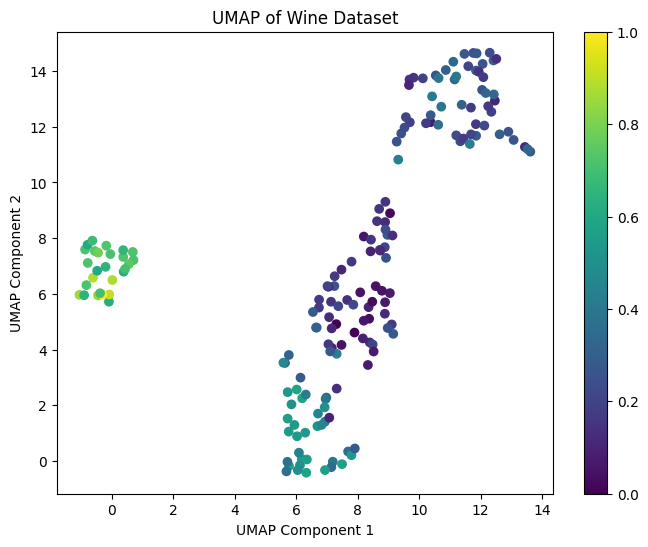

In [93]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=winedata_normalized.target, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of Wine Dataset')
plt.colorbar()
plt.show()